# <span style='color:green'> Mini-Projeto 3 - Eduardo Freitas </span>
# Dashboard de Recursos Humanos Com Power BI e Linguagem Python

### DSA - Python e PowerBI Para Manipulação de Dados

## <font color='green'>Definição do Problema</font>

A empresa ZuZa Inc coletou dados do ano anterior com diversos atributos de funcionários de todos os setores. O objetivo é estudar a relação desses atributos e o impacto na promoção dos funcionários. Esse trabalho de análise pode ser usado mais tarde para construir modelos de Machine Learning para prever se um colaborador será ou não promovido.

Essas são as perguntas que devem ser respondidas:

- Pergunta 1 - Qual a Correlação Entre os Atributos dos Funcionários?
- Pergunta 2 - Qual o Tempo de Serviço da Maioria dos Funcionários?
- Pergunta 3 - Qual Avaliação do Ano Anterior Foi Mais Comum?
- Pergunta 4 - Qual a Distribuição das Idades dos Funcionários?
- Pergunta 5 - Qual o Número de Treinamentos Mais Frequente?
- Pergunta 6 - Qual a Proporção dos Funcionários Por Canal de Recrutamento?
- Pergunta 7 - Qual a Relação Entre a Promoção e a Avaliação do Ano Anterior?

Seu trabalho é limpar e preparar os dados e então construir um dashboard no Power BI para apresentar seus resultados.

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python utilizada neste Jupyter Notebook:', python_version())

Versão da Linguagem Python utilizada neste Jupyter Notebook: 3.8.8


## <font color='green'>Carregando e Instalando Pacotes</font>

#### Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:

pip install -U nome_pacote

#### Para instalar a versão exata de um pacote, execute o comando abaixo no termianl ou prompt de comando:
!pip install nome_pacote==versão_desejada




In [2]:
#Instala o pacote watermark.
# Este pacote grava as versões de outros pacotes usados neste Jupyter Notebook.
!pip install -q -U watermark

In [3]:
# Importar pacotes
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Versões dos pacotes usados neste Jupyter Notebook
%reload_ext watermark
%watermark -a "Mini-Projeto 3 - Microsoft Power BI para Data Science 2.0 - DSA" --iversions

Author: Mini-Projeto 3 - Microsoft Power BI para Data Science 2.0 - DSA

matplotlib: 3.3.4
pandas    : 1.2.4
numpy     : 1.20.1
seaborn   : 0.11.1



## <font color='green'>Carregando os Dados</font>

In [5]:
# Chama o pacote Pandas para ler o conjunto de dados CSV e grava na variával dadosRH
dadosRH = pd.read_csv('dadosRH.csv')

## <font color='green'>Conhecendo os Dados</font>

#### Colunas:

1. id_funcionario = ID do Funcionário.
2. departmento = Departamento do Funcionário.
3. regiao = Região do Funcionário.  
4. educacao = Nível de Educação do Funcionário: Ensino Médio, Superior ou Mestrado ou Doutorado.  
5. genero = F - Feminino ou M - Masculino.   
6. canal_recrutamento = Como funcionário foi recrutado: Indicado, Outsourcing (terceirizado) ou Outro.
7. numero_treinamentos - Número de Treinamentos que o funcionário realizou.
8. idade = Idade do Funcionário.   
9. aval_ano_anterior = Avaliação do Funcionário feita pelo seu superior (Nota de 1 a 5).   
10. tempo_servico = Número de Meses que o funcionário trabalha.
11. promovido = 0 - Não foi promovido / 1 - Foi promovido.

In [6]:
# Chama o Pandas para ler as primeiras 10 linhas dos dadosRH
dadosRH.head(10)

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0
5,58896,Analytics,Sul,Superior,M,Outsourcing,2,31,3.0,7,0
6,20379,Logistica,Sul,Superior,F,Outro,1,31,3.0,5,0
7,16290,Logistica,Sudeste,Mestrado ou Doutorado,M,Outsourcing,1,33,3.0,6,0
8,73202,Analytics,Sul,Superior,M,Outro,1,28,4.0,5,0
9,28911,Marketing,Sudeste,Mestrado ou Doutorado,M,Outsourcing,1,32,5.0,5,0


In [7]:
# Forma dos dadosRH
print("Forma da base de dados do RH (linhas, colunas):", dadosRH.shape)

Forma da base de dados do RH (linhas, colunas): (54808, 11)


## <font color='green'>Análise Exploratória, Limpeza e Transmormação de Dados</font>
Manipulando os dados e corrigindo eventuais problemas.

In [8]:
# Verifica se existe registros nulos na base de dados
# E traz o somatório de registros nulos.
dadosRH.isnull().sum()

id_funcionario            0
departmento               0
regiao                    0
educacao               2409
genero                    0
canal_recrutamento        0
numero_treinamentos       0
idade                     0
aval_ano_anterior      4124
tempo_servico             0
promovido                 0
dtype: int64

In [9]:
# Agrupa os dados pelo Nível de Educação
# E conta quantos registros tem para cada nível.
dadosRH.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,458,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14798,14925,14925
Superior,36669,36669,36669,36669,36669,36669,36669,33404,36669,36669


### <font color = 'red'>Problema 1: Registros Nulos </font>

Veja que o comando .groupby() não totaliza 54808 registros (linhas) pois não contabiliza os registros nulos.

805 + 14925 + 36669 = 52.399    != 54808

<AxesSubplot:xlabel='educacao', ylabel='count'>

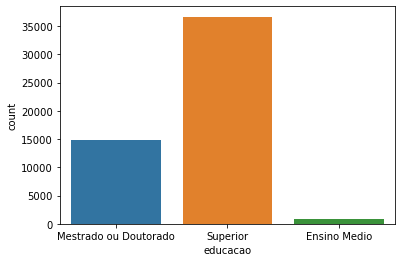

In [10]:
# Visualiza o número de registros para cada Nível de Educação
sns.countplot(x = dadosRH['educacao'])

In [11]:
# Agrupa os dados pela Nota de Avaliação do Ano Anterior
# E conta quantos registros tem para cada nota.
dadosRH.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,5887,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4035,4225,4225,4225,4225,4225,4225
3.0,18618,18618,18618,17867,18618,18618,18618,18618,18618,18618
4.0,9877,9877,9877,9509,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11362,11741,11741,11741,11741,11741,11741


<AxesSubplot:xlabel='aval_ano_anterior', ylabel='count'>

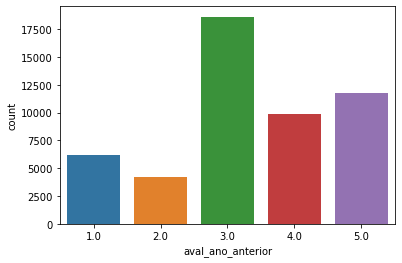

In [12]:
# Visualiza o número de registros para cada Nota de Avaliação do Ano Anterior
sns.countplot(x = dadosRH['aval_ano_anterior'])

### <font color = 'green'>Resolvendo o problema de registros nulos com Imputação </font>

In [13]:
# Chama o método .fillna() para preencher valores ausentes na coluna educacao
# Preenche os ausentes com o maior valor da Moda e salva o resultado na própria tabela.

# A moda é o valor que aparece com a maior frequência e é calculada desconsiderando os valores ausentes.

dadosRH['educacao'].fillna(dadosRH['educacao'].mode()[0], inplace = True)

In [14]:
# Chama o método .fillna() para preencher valores ausentes na coluna aval_ano_anterior
# Preenche os ausentes com o valor da mediana e salva o resultado na própria tabela.

# A mediana é o valor do meio da distribuição e é calculada desconsiderando os valores ausentes.

dadosRH['aval_ano_anterior'].fillna(dadosRH['aval_ano_anterior'].median(), inplace = True)

In [15]:
# Verifica se ainda existe registros nulos na base de dados
dadosRH.isnull().sum()

id_funcionario         0
departmento            0
regiao                 0
educacao               0
genero                 0
canal_recrutamento     0
numero_treinamentos    0
idade                  0
aval_ano_anterior      0
tempo_servico          0
promovido              0
dtype: int64

In [16]:
# Verifica se a forma base de dados foi alterada:
print("Forma da base de dados do RH (linhas, colunas):", dadosRH.shape)

Forma da base de dados do RH (linhas, colunas): (54808, 11)


In [17]:
# Dados Atualizados
# Agrupa novamente os dados pelo Nível de Educação
# E conta quantos registros tem para cada nível.
dadosRH.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,805,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14925,14925,14925
Superior,39078,39078,39078,39078,39078,39078,39078,39078,39078,39078


In [18]:
# Dados Atualizados
# Agrupa novamente os dados pela Nota de Avaliação do Ano Anterior
# E conta quantos registros tem para cada nota.
dadosRH.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4225,4225,4225,4225,4225,4225,4225
3.0,22742,22742,22742,22742,22742,22742,22742,22742,22742,22742
4.0,9877,9877,9877,9877,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11741,11741,11741,11741,11741,11741,11741


### <font color = 'red'>Problema 2: Desbalanceamento de Classe </font>

Veja abaixo a enorme diferença entre o número de pessoas que foram promovidas e as pessoas que não foram promovidas. Apesar de estar coerente com a realidade da empresa, se levassemos estes exemplos para um modelo de Aprendizagem de Máquina, ele iria aprender muito mais da classe 0 do que da classe 1.

In [19]:
dadosRH.groupby(['promovido']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico
promovido,,,,,,,,,,
0,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140
1,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668


<AxesSubplot:xlabel='promovido', ylabel='count'>

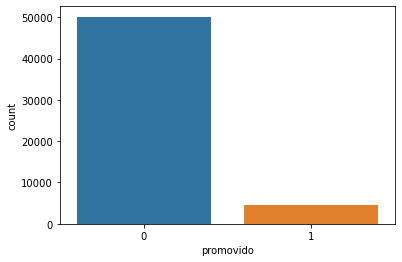

In [20]:
sns.countplot(x = dadosRH['promovido'])

### <font color = 'green'>Resolvendo o Desbalanceamento de Classe com Oversampling (ou up sample)</font>
A Técnica de Oversampling é uma solução. Usando uma técnica estatística de reamostragem, vamos aumentar os exemplos da classe minoritária (classe 1), criando registros sinteticos.

__Reduzir os registros de funcionários não promovidos parece uma solução mais fácil. Mas fazendo isso estará desperdiçando a maior parte de dados reais.__

In [21]:
# Define as classes majoritaria (df_classe_major) e minoritaria (df_classe_minor)

df_classe_major = dadosRH[dadosRH.promovido==0]
df_classe_minor = dadosRH[dadosRH.promovido==1]

In [22]:
# Forma da classe Majoritaria

df_classe_major.shape

(50140, 11)

In [23]:
# Forma da classe Minoritaria

df_classe_minor.shape

(4668, 11)

In [24]:
# Realizando o Oversampling

# sklearn é uma biblioteca para Machine Learning e sua função resample faz a reamostragem.
from sklearn.utils import resample

# Faz a reamostragem na classe minotiratia e subistitui a amostra anterior pela nova reamostragem de 50140 registros.
df_classe_minor_upsampled = resample(df_classe_minor,
                                    replace = True,
                                    n_samples = 50140,
                                    random_state = 150) # Faz com que repita sempre o mesmo resultado de amostras.

## <font color='green'> Nova base de dadosRH</font>
Base de dados sem registros nulos, balanceada e pronta para execução

In [25]:
# Cria a nova e balanceada base de dadosRH, 
# concatenando a classe Majoritaria com a nova classe Minoritaria com os exemplos aumentados.

dadosRH_balanceados = pd.concat([df_classe_major, df_classe_minor_upsampled])

In [26]:
# Conta a quantidade de registros para cada classe.

dadosRH_balanceados.promovido.value_counts()

0    50140
1    50140
Name: promovido, dtype: int64

In [27]:
# Traz as novas informações sobre cada coluna.
# Sem valores nulos e balanceada.

dadosRH_balanceados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100280 entries, 0 to 5869
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_funcionario       100280 non-null  int64  
 1   departmento          100280 non-null  object 
 2   regiao               100280 non-null  object 
 3   educacao             100280 non-null  object 
 4   genero               100280 non-null  object 
 5   canal_recrutamento   100280 non-null  object 
 6   numero_treinamentos  100280 non-null  int64  
 7   idade                100280 non-null  int64  
 8   aval_ano_anterior    100280 non-null  float64
 9   tempo_servico        100280 non-null  int64  
 10  promovido            100280 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 9.2+ MB


<AxesSubplot:xlabel='promovido', ylabel='count'>

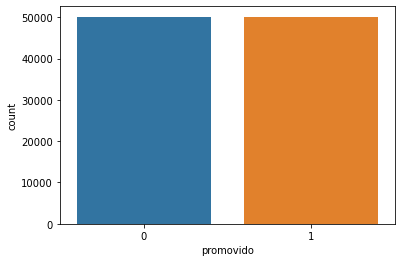

In [28]:
# Visualiza o balanceamento da base de dados.
sns.countplot(x = dadosRH_balanceados['promovido'])

### <font color = 'green'>Salvando a base de dados modificada no disco. </font>

In [29]:
# Salva a base de dados no arquivo dadosRH_modificado.csv, utilizando encoding utf-8 e sem o índice criado pelo Pandas.

dadosRH_balanceados.to_csv('dadosRH_modificado.csv', encoding = 'utf-8', index = False)

In [30]:
# Salva a leitura do arquivo dadosRH_modificado.csv na variável dataset.
dataset = pd.read_csv('dadosRH_modificado.csv')
dataset.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [31]:
# Verifica se a forma do dataset.
print("Forma do novo dataset (linhas, colunas):", dataset.shape)

Forma do novo dataset (linhas, colunas): (100280, 11)


## <font color='blue'> Pegunta 1 - Qual a Correlação Entre os Atributos dos Funcionários?</font>

Cria um Mapa de Calor trazendo a Correlação Positiva* entre as variáveis.

Alguns exemplos:

- 1.0 - Correlação alta por é correlacionada a si mesma.
- 0.6 - Quanto maior o tempo de serviço, maior a idade.
- 0.4 - Quanto maior a nota de Avaliação, maior a chance de promoção.

Lembrando que correlação nao implica causalidade, portanto é provavel que outros fatores também expliquem esta correlação.

__NOTA__: O conjunto de dados possui variaveis categóricas e variáveis numéricas.
O ideal é criar uma matriz de correlação pára variáveis numéricas e uma matriz de associação para variaveis categóricas.
Para simplicar, criamos apenas a matriz de correlação, visto que todas tabelas tem números.

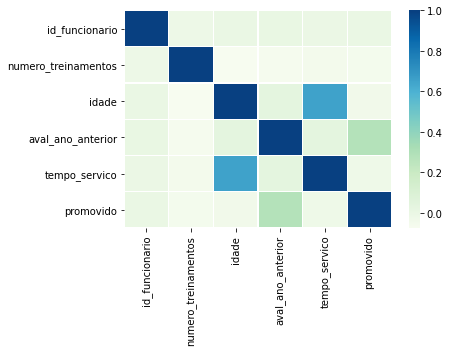

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cria a matriz de Correlação
corr = dataset.corr()

# Usa o função seaborn.heatmap() para criar o Mapa de Calor. Paleta de Cores = GnBU, Largura da Linha = 0.1
sns.heatmap(corr, cmap = "GnBu", linewidths = 0.1)
plt.show() # Exibe o mapa.

## <font color='blue'> Pegunta 2 - Qual o Tempo de Serviço da Maioria dos Funcionários?</font>

No Gráfico de Distribuição abaixo temos o número de funcionários no eixo Y e o tempo de serviços em anos no eixo X.
É possível notar que a maioria permanece na empresa entre 2 a 5 anos.

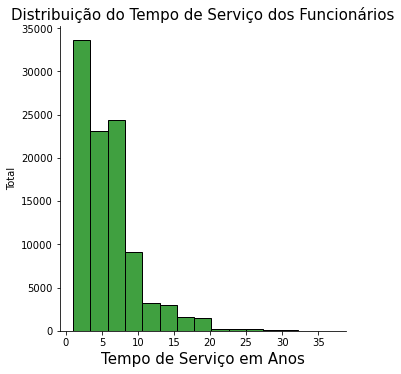

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chama a função seaborn.displot() para visualizar a distribuição de tempo de serviço dos funcionários.
sns.displot(dataset['tempo_servico'], color = 'green', bins = 15) 
plt.title('Distribuição do Tempo de Serviço dos Funcionários', fontsize = 15) # Titulo do Gráfico
plt.xlabel('Tempo de Serviço em Anos', fontsize = 15) # Rotula o eixo X
plt.ylabel('Total') # Rotula o eixo Y
plt.show() # Exibe o gráfico.

## <font color='blue'> Pegunta 3 - Qual Avaliação do Ano Anterior foi mais comum?</font>

Veja no Gráfico de Barras que a maioria está na média (nota 3.0). 

_"O que é o normal!"_

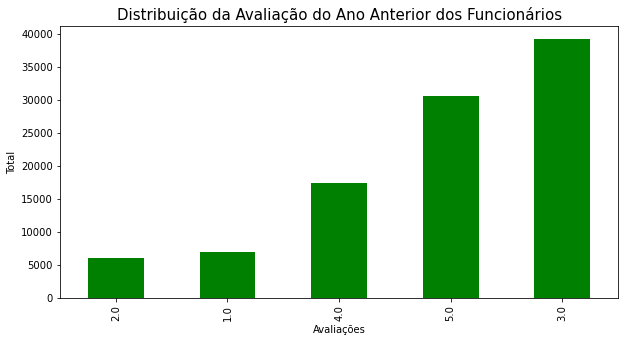

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conta e ordena todos os elementos da coluna aval_ano_anterior.
# E cria um Gráfico de Barras 
dataset['aval_ano_anterior'].value_counts().sort_values().plot.bar(color = 'green', figsize= (10,5))
plt.title('Distribuição da Avaliação do Ano Anterior dos Funcionários', fontsize = 15) # Titulo do Gráfico
plt.xlabel('Avaliações') # Rotula o eixo X
plt.ylabel('Total') # Rotula o eixo Y
plt.show() # Exibe o gráfico.

## <font color='blue'> Pegunta 4 - Qual a Distribuição das Idades dos Funcionários?</font>

A maioria dos funcionários está na faixa etária de 30 a 40 anos.

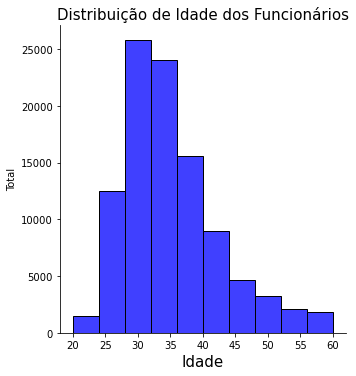

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chama a função seaborn.displot() para visualizar a distribuição de idade dos funcionários
sns.displot(dataset['idade'], color = 'blue', bins = 10) 
plt.title('Distribuição de Idade dos Funcionários', fontsize = 15) # Titulo do Gráfico
plt.xlabel('Idade', fontsize = 15) # Rotula o eixo X
plt.ylabel('Total') # Rotula o eixo Y
plt.show() # Exibe o gráfico.

## <font color='blue'> Pegunta 5 - Qual o Número de Treinamentos mais Frequente?</font>

Os funcionários realizam poucos treinamentos. A maioria fez apenas um treinamento.

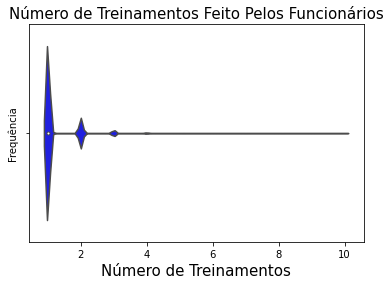

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chama a função seaborn.violinplot() para visualizar a frequência
sns.violinplot(x = dataset['numero_treinamentos'], color = 'blue')
plt.title('Número de Treinamentos Feito Pelos Funcionários', fontsize = 15) # Titulo do Gráfico
plt.xlabel('Número de Treinamentos', fontsize = 15) # Rotula o eixo X
plt.ylabel('Frequência') # Rotula o eixo Y
plt.show() # Exibe o gráfico.

## <font color='blue'> Pergunta 6 - Qual a Proporção dos Funcionários Por Canal de Recrutamento?</font>

Um simples Gráfico de Pizza mostra que a empresa prefere não contratar apenas por indicação.

In [37]:
# Conto os elementos de Canal de Recrutamento
dataset['canal_recrutamento'].value_counts()

Outro          55375
Outsourcing    42358
Indicado        2547
Name: canal_recrutamento, dtype: int64

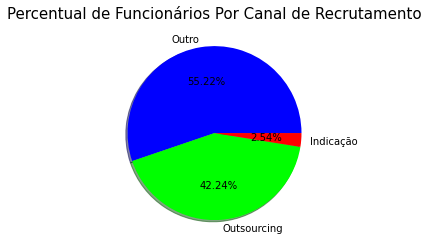

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns


fatias = [55375, 42358, 2547] # Peso de cada 'Fatia' do Gráfico de 'Pizza'
labels = "Outro", "Outsourcing", "Indicação" # Rótulos das Fatias
colors = ['blue', 'lime', 'red'] # Cores das Fatias
explode = [0, 0, 0] # Distanciamento entre as fatias

# Chamo a função matplotlib.pyplot.pie() para criar um Gráfico de Pizza exibindo a proporção e porcentagem de cada Canal.
plt.pie(fatias, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('Percentual de Funcionários Por Canal de Recrutamento', fontsize = 15)
plt.axis('off')
#plt.legend()
plt.show()

## <font color='blue'> Pergunta 7 - Qual a Relação Entre a Promoção e a Avaliação do Anterior?</font>

Assim como esperado, os funcionários com as melhores avaliações são os que tendem a ser promovidos.

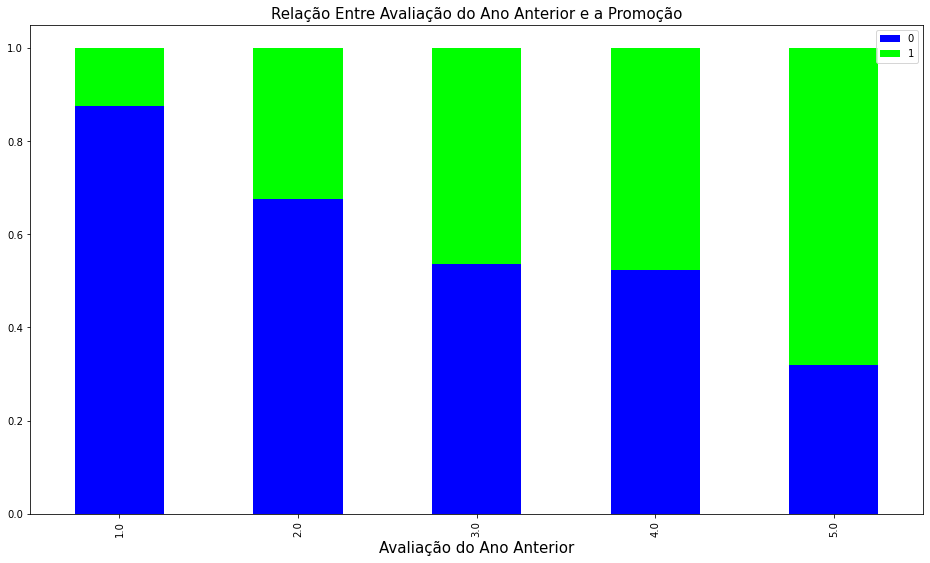

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupo os registros num Dataframe - aval_ano_anterior e promovido - utilizando o pandas.crosstab.
data = pd.crosstab(index = dataset['aval_ano_anterior'], columns = dataset['promovido'])

# Divide o Dataframe de modo que cada coluna tenha a soma = 1.
# Exibe um gráfico de colunas empilhadas.
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                  stacked = True,
                                                  figsize = (16,9),
                                                  color = ['blue', 'lime'])
plt.title('Relação Entre Avaliação do Ano Anterior e a Promoção', fontsize = 15)
plt.xlabel('Avaliação do Ano Anterior', fontsize = 15)
plt.legend()
plt.show()

# <font color = 'blue'>The End.</font>